In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1.0,0.0,0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0.0,0.0,3,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0.0,0.0,3,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0.0,0.0,2,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0.0,0.0,2,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,70
355,2,2,2,1,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,70
356,2,1,0,3,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
float64		column 5	35
float64		column 6	35
int64		column 7	0
float64		column 8	141
float64		column 9	141
float64		column 10	141
int64		column 11	0
float64		column 12	106
int64		column 13	0
float64		column 14	35
int64		column 15	0
float64		column 16	141
int64		column 17	0
int64		column 18	0
float64		column 19	35
int64		column 20	0
float64		column 21	141
float64		column 22	141
float64		column 23	71
float64		column 24	141
float64		column 25	141
float64		column 26	106
float64		column 27	141
float64		column 28	141
float64		column 29	141
float64		column 30	141
float64		column 31	141
int64		column 32	0
float64		column 33	141
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,323.000000,323.000000,358.000000,217.000000,217.000000,217.000000,...,217.000000,252.000000,217.000000,217.000000,217.000000,217.000000,217.000000,358.000000,217.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.650155,0.473684,0.170391,0.447005,0.594470,0.502304,...,0.423963,0.480159,0.493088,1.023041,0.502304,0.105991,0.119816,1.877095,0.608295,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.921563,0.982022,0.576394,0.911959,0.986749,0.898169,...,0.879276,0.885700,0.986576,1.144400,0.991279,0.454210,0.504080,0.699324,1.146058,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

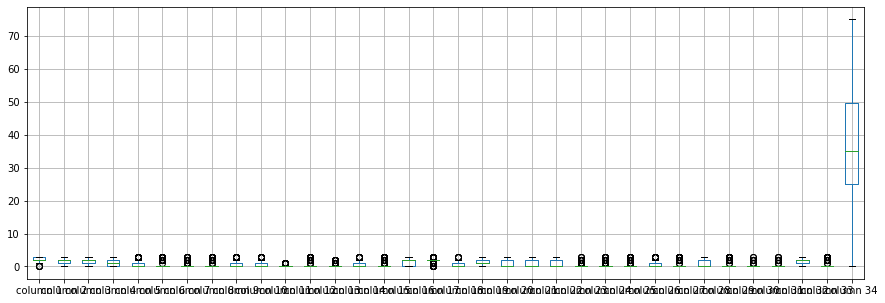

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.650155
column 6      0.473684
column 7      0.170391
column 8      0.447005
column 9      0.594470
column 10     0.502304
column 11     0.122905
column 12     0.416667
column 13     0.142458
column 14     0.535604
column 15     0.315642
column 16     1.414747
column 17     1.955307
column 18     0.511173
column 19     1.291022
column 20     0.662011
column 21     0.926267
column 22     0.640553
column 23     0.247387
column 24     0.368664
column 25     0.423963
column 26     0.480159
column 27     0.493088
column 28     1.023041
column 29     0.502304
column 30     0.105991
column 31     0.119816
column 32     1.877095
column 33     0.608295
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.010138,0.035746,-0.115275,-0.022330,0.163507,0.221558,...,-0.028931,0.146677,0.004331,0.042414,0.003435,-0.037925,-0.022384,0.093026,-0.024701,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.013102,-0.081719,-0.098665,-0.110545,0.307575,0.300899,...,-0.099801,0.186712,-0.128660,0.005825,-0.125359,0.009607,0.016591,-0.008453,-0.144784,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239945,0.328261,-0.176715,0.281905,0.295130,0.253082,...,0.274213,0.338814,0.292973,-0.265896,0.270337,-0.113521,-0.149834,0.124812,0.273115,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.299581,0.409830,-0.144027,0.348850,-0.283506,-0.155316,...,0.343074,-0.180965,0.339800,0.035188,0.367237,-0.204953,-0.209106,0.051553,0.367875,0.048053
column 5,-0.010138,-0.013102,0.239945,0.299581,1.000000,0.375852,-0.173568,0.371074,-0.086859,0.006280,...,0.365086,-0.017534,0.348613,0.032243,0.345122,-0.169550,-0.172703,0.108990,0.358964,0.083444
column 6,0.035746,-0.081719,0.328261,0.409830,0.375852,1.000000,-0.143692,0.897225,-0.299711,-0.262976,...,0.896895,-0.125785,0.917157,0.125582,0.912784,-0.116089,-0.118248,0.259597,0.910762,0.096448
column 7,-0.115275,-0.098665,-0.176715,-0.144027,-0.173568,-0.143692,1.000000,-0.134160,0.216506,-0.010225,...,-0.102791,-0.153365,-0.136798,0.024386,-0.138694,0.821200,0.851227,-0.093833,-0.137813,-0.371368
column 8,-0.022330,-0.110545,0.281905,0.348850,0.371074,0.897225,-0.134160,1.000000,-0.296665,-0.275392,...,0.905734,-0.137239,0.911658,0.145346,0.923239,-0.114909,-0.117046,0.331745,0.916906,0.087715
column 9,0.163507,0.307575,0.295130,-0.283506,-0.086859,-0.299711,0.216506,-0.296665,1.000000,0.674922,...,-0.286495,0.555099,-0.292987,-0.422165,-0.306691,0.240960,0.237753,-0.083784,-0.296682,-0.151808
column 10,0.221558,0.300899,0.253082,-0.155316,0.006280,-0.262976,-0.010225,-0.275392,0.674922,1.000000,...,-0.265043,0.512179,-0.254684,-0.430196,-0.269099,-0.017624,-0.000613,0.025674,-0.253234,-0.061597


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+54,34+54+54,34+54+54+54,34+54+54+54+54,34+54+54+54+54+54,34+54+54+54+54+54+54,34+54+54+54+54+54+54+54,34+54+54+54+54+54+54,34+54+54+54+54+54,34+54+54+54+54,34+54+54+54,34+54+54,34+54,34], vae_layer = False, seed = 54)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 69.34154614535245
Epoch: 1 , loss: 70.01835909756747
Epoch: 2 , loss: 69.67025739496404
Epoch: 3 , loss: 69.14100369540128
Epoch: 4 , loss: 69.03151980313388
Epoch: 5 , loss: 68.41293733770198
Epoch: 6 , loss: 65.85641340775923
Epoch: 7 , loss: 64.21597966280851
Epoch: 8 , loss: 63.51084813204679
Epoch: 9 , loss: 63.050264531915836
Epoch: 10 , loss: 62.27652341669256
Epoch: 11 , loss: 62.22807312011719
Epoch: 12 , loss: 61.757816488092594
Epoch: 13 , loss: 61.375348871404476
Epoch: 14 , loss: 60.88957249034535
Epoch: 15 , loss: 60.52880651300604
Epoch: 16 , loss: 60.37691688537598
Epoch: 17 , loss: 60.176550605080344
Epoch: 18 , loss: 59.829045209017664
Epoch: 19 , loss: 60.027935548262164
Epoch: 20 , loss: 59.62385021556508
Epoch: 21 , loss: 59.12446611577814
Epoch: 22 , loss: 58.96682513843883
Epoch: 23 , loss: 58.58490961248224
Epoch: 24 , loss: 58.09566428444602
Epoch: 25 , loss: 56.955407576127485

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.095943
column 9      0.321779
column 10     0.335223
column 11     0.000000
column 12     0.053703
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     0.804283
column 17     1.000000
column 18     1.000000
column 19     0.943838
column 20     0.000000
column 21     0.621105
column 22     0.425225
column 23     0.000000
column 24     0.186352
column 25     0.130585
column 26     0.368969
column 27     0.140856
column 28     0.600845
column 29     0.148890
column 30     0.004116
column 31     0.041745
column 32     1.000000
column 33     0.194892
column 34    12.000000
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
1,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
2,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
3,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
4,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0.00000,0.000000,0,0.301456,-2.64590,-1.454017,...,0.336210,0.635489,0.355439,0.921580,0.330045,0.040129,0.124737,0,0.518303,0
355,0,0,0,0,0.73489,0.443171,0,0.350442,0.36315,0.539093,...,0.347527,0.551955,0.385587,-1.213379,0.382010,0.071347,0.112439,0,0.561277,0
356,0,0,0,0,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(45.74726899416202, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.06034682120921592

In [27]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1.00000,0.000000,0,0.000000,2.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2.000000,0
1,1,1,2,0,0.00000,0.000000,3,0.000000,3.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2,0.000000,7
2,2,2,1,0,0.00000,0.000000,3,0.000000,2.00000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000,2,0.000000,7
3,2,2,2,1,0.00000,0.000000,2,0.000000,2.00000,2.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2,0.000000,7
4,2,2,1,0,0.00000,0.000000,2,0.000000,2.00000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0.00000,0.000000,0,0.301456,0.35410,0.545983,...,0.336210,0.635489,0.355439,0.921580,0.330045,0.040129,0.124737,1,0.518303,70
355,2,2,2,1,0.73489,0.443171,0,0.350442,0.36315,0.539093,...,0.347527,0.551955,0.385587,0.786621,0.382010,0.071347,0.112439,2,0.561277,70
356,2,1,0,3,0.00000,0.000000,0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70


In [29]:
imputations[-1].to_excel("DERM_AG_20(imp).xlsx", index=False, header=False)